# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [73]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url,
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [74]:
df['sex'] = df['sex'].map({0: 'female', 1:'male'})

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    object 
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(10), int64(1), object(3)
memory usage: 33.3+ KB


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [123]:
# coluna target para verificar se o paciente é ou não é doente
# 0 - Não tem cardiopátia
# 1 - Tem cardiopátia
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target
0,63.0,male,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,male,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,male,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,male,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,female,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,male,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,male,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,male,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,female,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


In [124]:
# verificando os valores
df['target'].value_counts()

,count
target,
0,164
1,139


In [125]:
tab = pd.crosstab(df['sex'], df['target'], margins= True)
tab

target,0,1,All
sex,,,
female,72,25,97
male,92,114,206
All,164,139,303


In [126]:
# média de doentes
tab['Mean'] = tab[1]/tab['All']
tab

target,0,1,All,Mean
sex,,,,
female,72,25,97,0.257732
male,92,114,206,0.553398
All,164,139,303,0.458746


In [127]:
# odds (chance)
tab['Odds'] = tab[1]/tab[0]
tab

target,0,1,All,Mean,Odds
sex,,,,,
female,72,25,97,0.257732,0.347222
male,92,114,206,0.553398,1.239130
All,164,139,303,0.458746,0.847561


In [128]:
# logito (log de odds)
tab['Logito'] = np.log(tab['Odds'])
tab

target,0,1,All,Mean,Odds,Logito
sex,,,,,,
female,72,25,97,0.257732,0.347222,-1.057790
male,92,114,206,0.553398,1.239130,0.214410
All,164,139,303,0.458746,0.847561,-0.165392


In [129]:
# OR
tab['Odds_Ratio'] = tab['Odds'] / tab.loc['All', 'Odds']
tab

target,0,1,All,Mean,Odds,Logito,Odds_Ratio
sex,,,,,,,
female,72,25,97,0.257732,0.347222,-1.057790,0.409672
male,92,114,206,0.553398,1.239130,0.214410,1.461996
All,164,139,303,0.458746,0.847561,-0.165392,1.000000


In [130]:
# WoE (Weight of Evidence)
tab['WOE'] = np.log(tab['Odds_Ratio'])
tab

target,0,1,All,Mean,Odds,Logito,Odds_Ratio,WOE
sex,,,,,,,,
female,72,25,97,0.257732,0.347222,-1.057790,0.409672,-0.892398
male,92,114,206,0.553398,1.239130,0.214410,1.461996,0.379802
All,164,139,303,0.458746,0.847561,-0.165392,1.000000,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [142]:
# Categorize a variável em 5 grupos
df['age_group'] = pd.qcut(df['age'], q=5)

# renomear categorias
print(df['age_group'].cat.categories)

df['age_group'] = df['age_group'].cat.rename_categories([
    '29 à 45 anos',
    '46 à 53 anos',
    '54 à 58 anos',
    '59 à 62 anos',
    '63 à 77 anos',
])


IntervalIndex([(28.999, 45.0], (45.0, 53.0], (53.0, 58.0], (58.0, 62.0],
               (62.0, 77.0]],
              dtype='interval[float64, right]')


In [145]:
# Calcule as mesmas quantidades calculadas no execício anterior

tab_age = pd.crosstab(df['age_group'], df['target'], margins=True)

tab_age['Mean'] = tab_age[1]/tab_age['All']
tab_age['Odds'] = tab_age[1]/tab_age[0]
tab_age['Logito'] = np.log(tab_age['Odds'])
tab_age['Odds_Ratio'] = tab_age['Odds'] / tab_age.loc['All', 'Odds']
tab_age['WOE'] = np.log(tab_age['Odds_Ratio'])

tab_age

target,0,1,All,Mean,Odds,Logito,Odds_Ratio,WOE
age_group,,,,,,,,
29 à 45 anos,47,16,63,0.253968,0.340426,-1.077559,0.401653,-0.912166
46 à 53 anos,42,22,64,0.343750,0.523810,-0.646627,0.618020,-0.481235
54 à 58 anos,32,39,71,0.549296,1.218750,0.197826,1.437950,0.363218
59 à 62 anos,13,32,45,0.711111,2.461538,0.900787,2.904261,1.066179
63 à 77 anos,30,30,60,0.500000,1.000000,0.000000,1.179856,0.165392
All,164,139,303,0.458746,0.847561,-0.165392,1.000000,0.000000


In [148]:
# Calcule também o valor médio da variável age

mean_age = df.groupby('age_group')['age'].mean().round(2)
tab_age['AvG Age'] = mean_age
tab_age

<ipython-input-148-4ea7740fa5b6>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_age = df.groupby('age_group')['age'].mean().round(2)


target,0,1,All,Mean,Odds,Logito,Odds_Ratio,WOE,AvG Age
age_group,,,,,,,,,
29 à 45 anos,47,16,63,0.253968,0.340426,-1.077559,0.401653,-0.912166,41.22
46 à 53 anos,42,22,64,0.343750,0.523810,-0.646627,0.618020,-0.481235,50.00
54 à 58 anos,32,39,71,0.549296,1.218750,0.197826,1.437950,0.363218,56.21
59 à 62 anos,13,32,45,0.711111,2.461538,0.900787,2.904261,1.066179,60.36
63 à 77 anos,30,30,60,0.500000,1.000000,0.000000,1.179856,0.165392,66.52
All,164,139,303,0.458746,0.847561,-0.165392,1.000000,0.000000,NaN


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

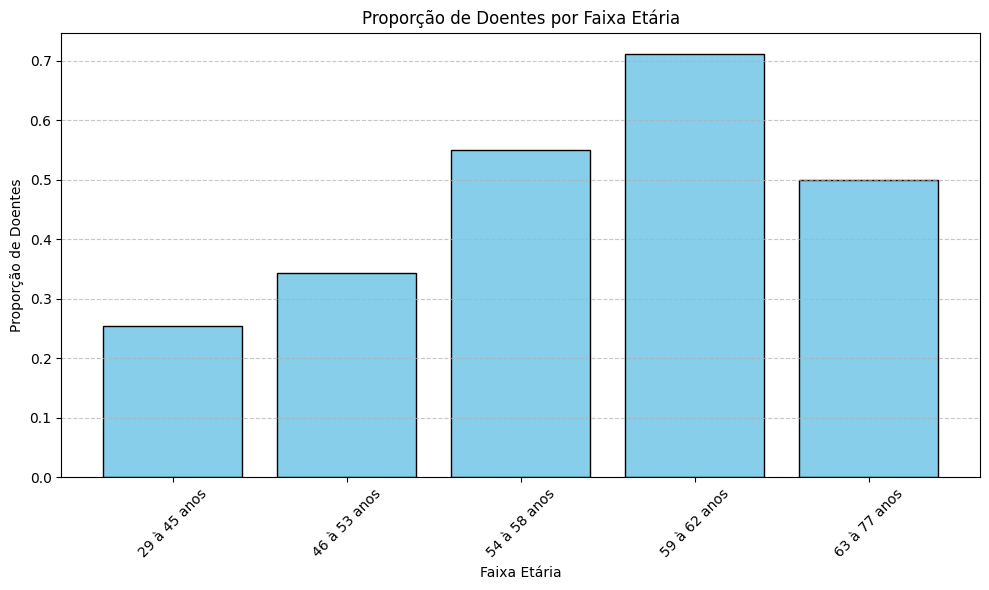

In [158]:
# visualizando tab_age em um gráfico de barras
tab_age_plot = tab_age.drop('All')

plt.figure(figsize=(10,6))
plt.bar(tab_age_plot.index.astype(str), tab_age_plot['Mean'], color='skyblue', edgecolor='black')
plt.xlabel('Faixa Etária')
plt.ylabel('Proporção de Doentes')
plt.title('Proporção de Doentes por Faixa Etária')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


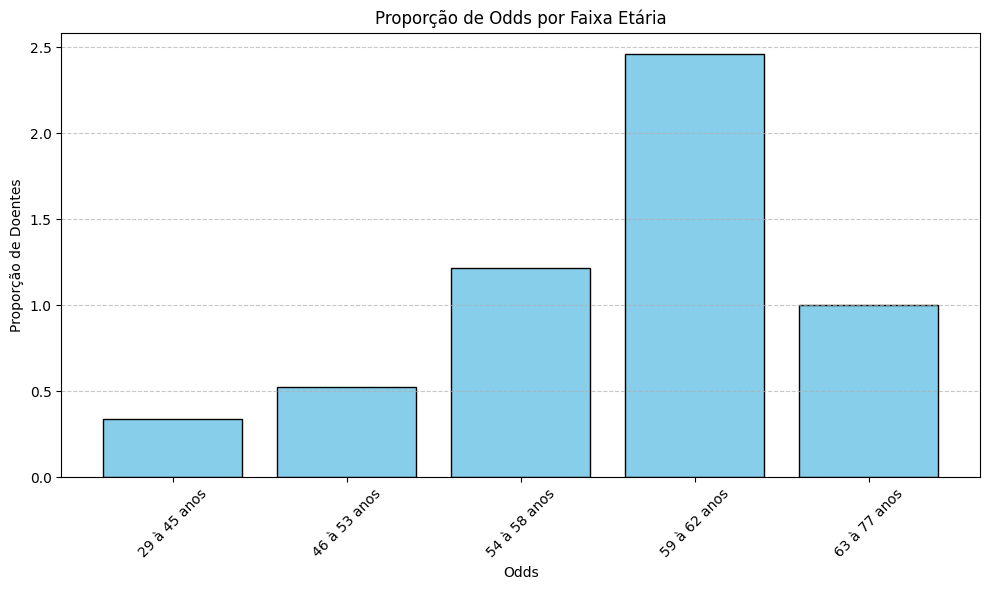

In [159]:
# visualizando Odds em tab_age em um gráfico de barras

plt.figure(figsize=(10,6))
plt.bar(tab_age_plot.index.astype(str), tab_age_plot['Odds'], color='skyblue', edgecolor='black')
plt.xlabel('Odds')
plt.ylabel('Proporção de Doentes')
plt.title('Proporção de Odds por Faixa Etária')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

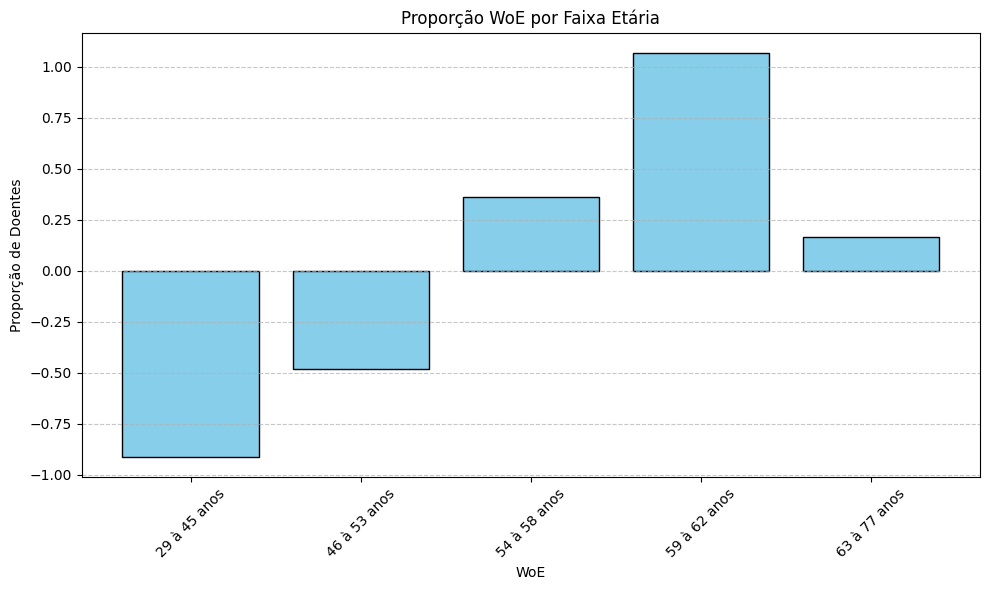

In [160]:
# visualizando WoE em tab_age em um gráfico de barras

plt.figure(figsize=(10,6))
plt.bar(tab_age_plot.index.astype(str), tab_age_plot['WOE'], color='skyblue', edgecolor='black')
plt.xlabel('WoE')
plt.ylabel('Proporção de Doentes')
plt.title('Proporção WoE por Faixa Etária')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()